### Add the scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 8&9\Adey-Innovations-Fraud-Detection\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the Data

In [4]:
# define path to the csv files
COUNTRY_IP_DATA = "../data/IpAddress_to_Country.csv"
FRAUD_DATA = "../data/Fraud_Data.csv"
CREDIT_DATA = "../data/creditcard.csv"

# load the data into pandas dataframes
country_ip_mapping = pd.read_csv(COUNTRY_IP_DATA)
fraud_data = pd.read_csv(FRAUD_DATA)
credit_data = pd.read_csv(CREDIT_DATA)

### Start of Exploratory Data Analysis

In [5]:
from scripts.exploratory_data_analyzer import EDAAnalyzer

# initialize the EDA analyzer
eda_analyzer = EDAAnalyzer(data=fraud_data)

#### 1. Basic Overview and summary statistics 

- Get basic info of the data's structure and column type definitions

In [6]:
eda_analyzer.basic_overview()

The data has a shape of: (151112, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


- Generate descriptive statistics for the numerical data

In [7]:
eda_analyzer.summary_statistics()

             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


- Missing data identification

In [8]:
eda_analyzer.missing_values()

These are columns with missing values greater than 0%:
Series([], dtype: float64)


- Observation of duplicate data

In [9]:
eda_analyzer.determine_duplicate()

The data has 0.0% duplicate data.


From the basic overview and summary statistics it can be observed that:

- The fraud data set has 151112 entries with 11 columns
- From those 151112 entrie there are no missing values nor duplicated ones in any of the 11 columns, this shows that the data collection processes is robust.
- From the results of the numerical summary statistics it can be said that the age distribution is slighly skeweed to the right since the mean is slightly bigger than the median.
- The class, whether the transaction is fraudulent, is moslty 0 while some of them are fruadulent. This means that the data is highly rigth skeweed, with most of the transactions belonging to the class 0(i.e no fruad) and a smaller protion belonging to the class 1(i.e fraud).

#### 2. Univariate Analysis

- Numerical column distributions

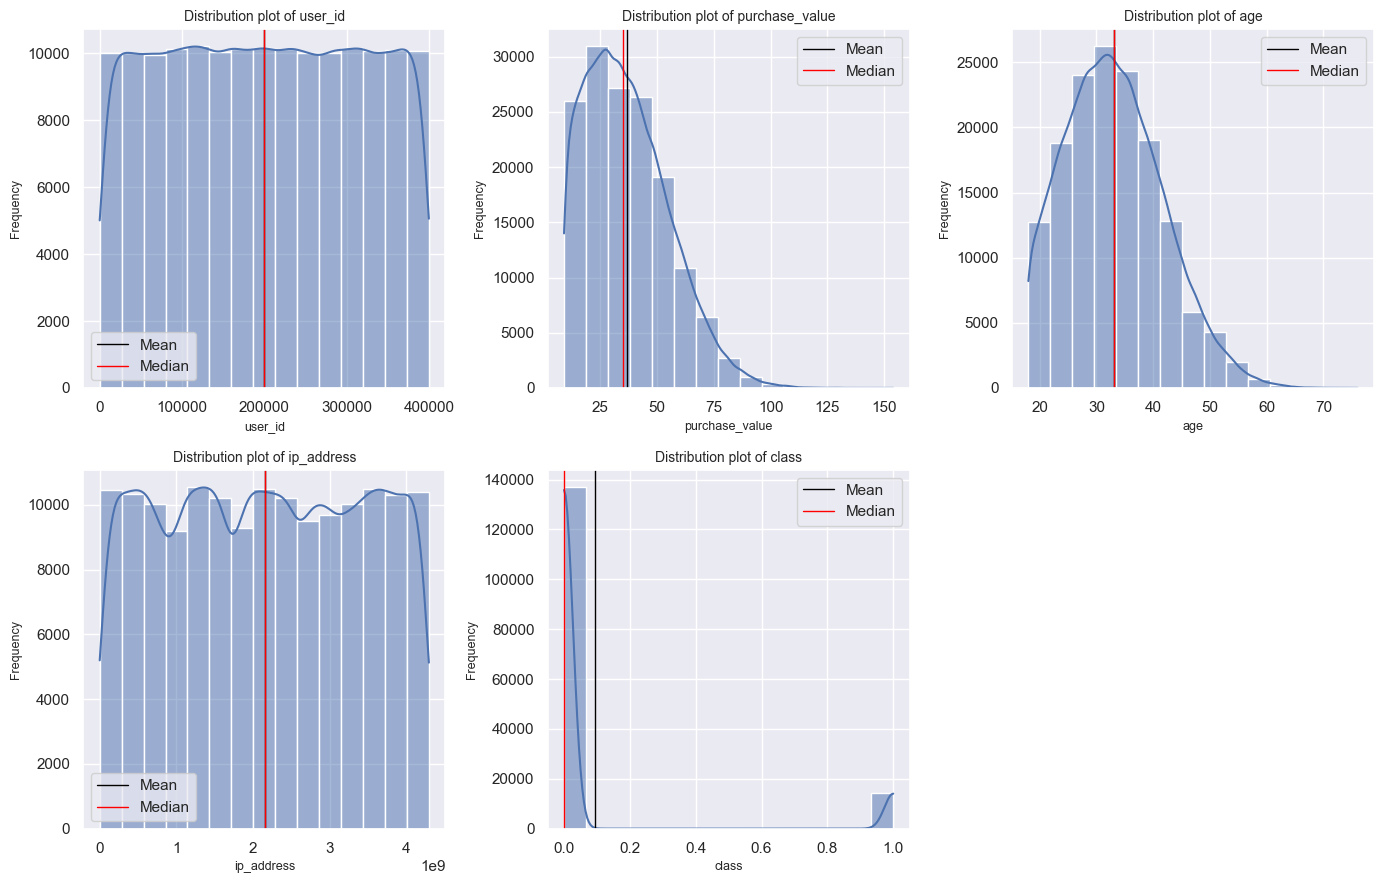

In [10]:
eda_analyzer.numerical_distribution()

**Observations:**

- ip_address and user_id follow a uniform distribution, this suggests that they are randomly assigned. This is true for the user_id column. But as of for the ip_address column it needs to be convereted into the country which it belongs to inorder to obtain any meaning full information. This will happen later on this notebook or even this project.
- purchase_value and age follow a right skewed distribution. This indicates that most users are among low age groups and a few are within higher age groups making the distribution right skeweed. As of the purchase_value it indicates that most users have a purchase value at lower ranges and some skew that data with higher bands of purchase value
- As of the class(i.e fraud or non_fraud) most of the transactions are not fraudulent while a few of them are fraudulent. Which makes the distribution a kind of bimodal distribution.

- Investigate the skewness of the numerical columns

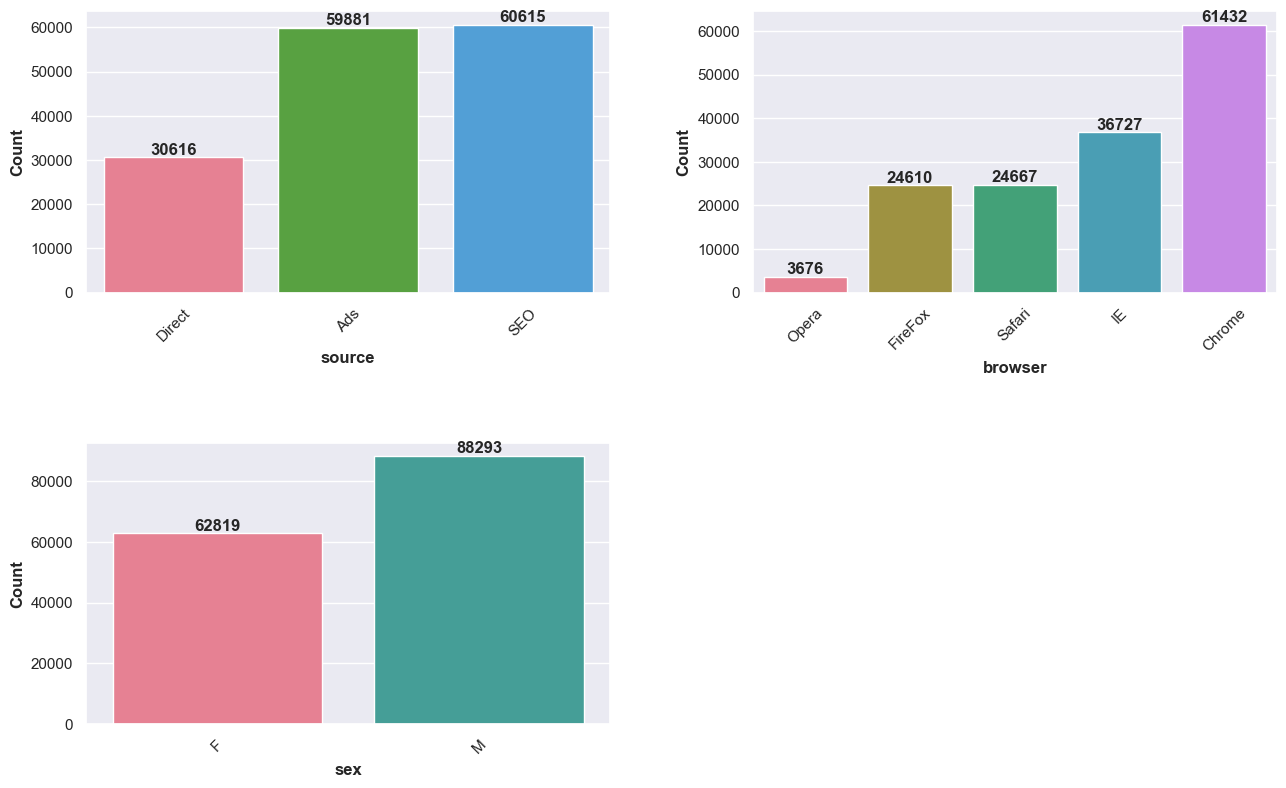

In [11]:
eda_analyzer.categorical_distribution()

**Observations:**

- From the transactions that occured **60,615** were driven by **SEO**, **59,881** were driven by **Ads** and **30,616** were drived by direct purchases from the webiste. This shows that most of the sales are coming from clients that are faces with Ads about a certain product and also by high ranking search values that appear on users searchs due to a really good SEO optimization by Adey Innovations. This shows me that most of the customers aren't seeing Adey as their primary go to place to buy products, at least as of the time of this current analysis.

- Most of the users are Male, this might be due to products that are more male oriented. The reason given is just a speculation undertaken inorder to avoid just listing the fact that is already seen on the plot.

- The browser used by most during purchases is **Chrome**, while **Opera** is the leasy used browser. **Safari** and **Firefox** account for roughly the same amount of purchases. **IE** is the second most used browser for making purchases.

#### 3. Bivariate Analysis

- Perfom a correlation analysis

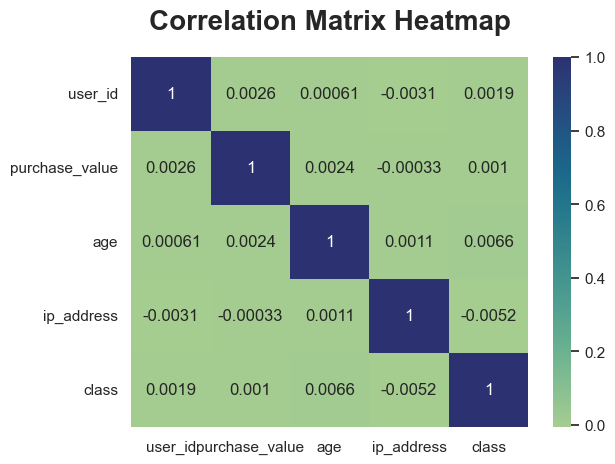

In [12]:
eda_analyzer.correlation_analysis()

**Observation:**

- Most of the correlation values are low values between 0 - 1. This indicates that there aren't glaring relationships between pair of features. 